In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from palettable.colorbrewer.sequential import YlOrRd_3, OrRd_3 # 引入相应的调色方案

# 注册本地思源宋体字体
font_manager.fontManager.addfont('NotoSerifSC-Regular.otf')

# 设置全局字体为思源宋体
plt.rcParams['font.sans-serif'] = ['Noto Serif SC']

In [2]:
# 准备绘图所需数据

# 股票型基金
df_stock = pd.DataFrame({
    '基金名称': [
        '前海开源公用事业股票',
        '泰达转型机遇',
        '东财新能源车A',
        '长信低碳环保行业量化股票',
        '东财新能源车C',
        '华夏能源革新股票',
        '汇添富中证新能源汽车A',
        '汇添富中证新能源汽车C',
        '金鹰信息产业股票A',
        '金鹰信息产业股票C'
    ],
    '近3月涨幅': [0.6162, 0.5942, 0.4388, 0.4381, 0.4373, 0.4229, 0.4163, 0.4155, 0.4133, 0.4119]
})

# 债券型基金
df_bond = pd.DataFrame({
    '基金名称': [
        '中航瑞明纯债A',
        '中航瑞明纯债C',
        '华商信用增强债券A',
        '华商信用增强债券C',
        '前海开源可转债债券',
        '金信民旺债券A',
        '金信民旺债券C',
        '广发可转债债券A',
        '广发可转债债券C',
        '金鹰元丰债券'
    ],
    '近3月涨幅': [0.5912, 0.4742, 0.1711, 0.1701, 0.1688, 0.1681, 0.1669, 0.1638, 0.1627, 0.1590]
})

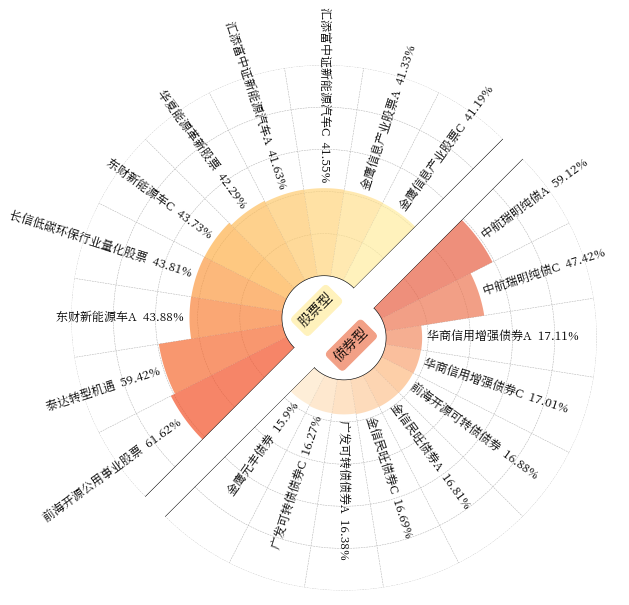

In [3]:
# 创建画布
fig, ax = plt.subplots(figsize=(10, 10))

# 关闭画布坐标轴显示
ax.axis('off')

# 构建左上半圆
polar1 = fig.add_axes((0.135, 0.265, 0.6, 0.6), 
                      polar=True, 
                      frameon=False)

# 设置网格线
polar1.set_thetagrids(np.linspace(0, 180, 11), ['']*11);
polar1.set_rgrids(np.linspace(0, 1, 6), ['']*6)

# 限制显示的角度及半径范围
polar1.set_xlim(0-0.002, np.pi+0.002)
polar1.set_ylim(-0.2, 1)
polar1.set_theta_offset(0.25*np.pi)

# 按角度推导出每个填充的扇区
for idx in range(10):
    
    polar1.fill_between(np.linspace(idx*np.pi/10, (idx+1)*np.pi/10, 100), 
                        0, 
                        df_stock.at[9-idx, '近3月涨幅'],
                        color=YlOrRd_3.mpl_colormap(idx / 10),
                        alpha=0.7,
                        edgecolor='none')

# 白色填充用于遮挡靠近圆心处的网格线
polar1.fill_between(np.linspace(0, np.pi, 100), 
                    -0.2, 
                    0,
                    color='white',
                    edgecolor='none')

# 设置网格线图层位于图形下方
polar1.set_axisbelow(True)

# 设置网格线线型和粗细
polar1.grid(linestyle='--', linewidth=0.5)

# 隐藏第一及倒数第一根半径轴线
polar1.xaxis.get_gridlines()[0].set_color('none')
polar1.xaxis.get_gridlines()[-1].set_color('none')

# 绘制黑色实线来强调半圆侧边线
polar1.plot([0, 0], [0, 1], color='black', linewidth=0.6)
polar1.plot([np.pi, np.pi], [0, 1], color='black', linewidth=0.6)
polar1.plot(np.linspace(0, np.pi, 100), [0]*100, color='black', linewidth=0.6)

# 根据角度推倒文字标注
for i in range(10):
    if i < 8:
        text = polar1.text((180-i*18-9)*np.pi/180, df_stock.at[i, '近3月涨幅']+0.025, 
                           df_stock.at[i, '基金名称']+'  '+str(round(100*df_stock.at[i, '近3月涨幅'], 2))+'%', 
                           rotation=45-i*18-9,
                           ha='right', va='center',
                           rotation_mode='anchor',
                           fontsize=12)
        
    else:
        text = polar1.text((180-i*18-9)*np.pi/180, df_stock.at[i, '近3月涨幅']+0.025, 
                           df_stock.at[i, '基金名称']+'  '+str(round(100*df_stock.at[i, '近3月涨幅'], 2))+'%', 
                           rotation=45-i*18-9-180,
                           ha='left', va='center',
                           rotation_mode='anchor',
                           fontsize=12)
        
        
# 添加“股票型”说明文字
polar1.text(90*np.pi/180, -0.15, '股票型', 
            rotation=45, 
            ha='center',
            va='center',
            fontsize=14,
            rotation_mode='anchor',
            bbox=dict(
                boxstyle="round",
                ec=np.array([255, 242, 188]) / 255,
                fc=np.array([255, 242, 188]) / 255
            ))


# 构建右下半圆
polar2 = fig.add_axes((0.265, 0.135, 0.6, 0.6), 
                      polar=True, 
                      frameon=False)

polar2.set_thetagrids(np.linspace(0, 180, 11), ['']*11);
polar2.set_rgrids(np.linspace(0, 1, 6), ['']*6)

polar2.set_xlim(0-0.002, np.pi+0.002)
polar2.set_ylim(-0.2, 1)
polar2.set_theta_offset(1.25*np.pi)

for idx in range(10):
    
    polar2.fill_between(np.linspace(idx*np.pi/10, (idx+1)*np.pi/10, 100), 
                        0, 
                        df_bond.at[9-idx, '近3月涨幅'],
                        color=OrRd_3.mpl_colormap(idx / 10),
                        alpha=0.7,
                        edgecolor='none')
    
polar2.fill_between(np.linspace(0, np.pi, 100), 
                    -0.2, 
                    0,
                    color='white',
                    edgecolor='none')

polar2.set_axisbelow(True)

polar2.grid(linestyle='--', linewidth=0.5)

polar2.xaxis.get_gridlines()[0].set_color('none')
polar2.xaxis.get_gridlines()[-1].set_color('none')

polar2.plot([0, 0], [0, 1], color='black', linewidth=0.6)
polar2.plot([np.pi, np.pi], [0, 1], color='black', linewidth=0.6)
polar2.plot(np.linspace(0, np.pi, 100), [0]*100, color='black', linewidth=0.6)

for i in range(10):
    if i < 8:
        text = polar2.text((180-i*18-9)*np.pi/180, df_bond.at[i, '近3月涨幅']+0.025, 
                           df_bond.at[i, '基金名称']+'  '+str(round(100*df_bond.at[i, '近3月涨幅'], 2))+'%', 
                           rotation=45-i*18-9,
                           ha='left', va='center',
                           rotation_mode='anchor',
                           fontsize=12)
        
    else:
        text = polar2.text((180-i*18-9)*np.pi/180, df_bond.at[i, '近3月涨幅']+0.025, 
                           df_bond.at[i, '基金名称']+'  '+str(round(100*df_bond.at[i, '近3月涨幅'], 2))+'%', 
                           rotation=45-i*18-9-180,
                           ha='right', va='center',
                           rotation_mode='anchor',
                           fontsize=12)

polar2.text(90*np.pi/180, -0.15, '债券型', 
            rotation=45, 
            ha='center',
            va='center',
            fontsize=14,
            rotation_mode='anchor',
            bbox=dict(
                boxstyle="round",
                ec=np.array([242, 160, 134]) / 255,
                fc=np.array([242, 160, 134]) / 255
            ))

fig.savefig('图6.png', dpi=500, bbox_inches='tight', pad_inches=0, facecolor='white')